# MediaPipe Holistic

In [1]:
! pip install mediapipe opencv-python

  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)


In [1]:
import mediapipe as mp
import cv2

### 1. Real Webcam Feed

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [3]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Real Webcam Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
cap.release()
cv2.destroyAllWindows()

### 2. Make Detections from Feed

In [4]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
        
        # Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [13]:
mp_holistic.POSE_CONNECTIONS

frozenset({(<PoseLandmark.NOSE: 0>, <PoseLandmark.LEFT_EYE_INNER: 1>),
           (<PoseLandmark.NOSE: 0>, <PoseLandmark.RIGHT_EYE_INNER: 4>),
           (<PoseLandmark.LEFT_EYE_INNER: 1>, <PoseLandmark.LEFT_EYE: 2>),
           (<PoseLandmark.LEFT_EYE: 2>, <PoseLandmark.LEFT_EYE_OUTER: 3>),
           (<PoseLandmark.LEFT_EYE_OUTER: 3>, <PoseLandmark.LEFT_EAR: 7>),
           (<PoseLandmark.RIGHT_EYE_INNER: 4>, <PoseLandmark.RIGHT_EYE: 5>),
           (<PoseLandmark.RIGHT_EYE: 5>, <PoseLandmark.RIGHT_EYE_OUTER: 6>),
           (<PoseLandmark.RIGHT_EYE_OUTER: 6>, <PoseLandmark.RIGHT_EAR: 8>),
           (<PoseLandmark.MOUTH_RIGHT: 10>, <PoseLandmark.MOUTH_LEFT: 9>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_ELBOW: 13>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_HIP: 23>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>,
            <PoseLandmark.LEFT_SHOULDER: 11>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.RIGHT_ELBOW: 14>)

### 3. Apply Styling

In [9]:
mp_drawing.draw_landmarks??

In [10]:
mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)

DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2)

In [11]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

### 4. input img

0 ../data/pre/1_front/0/0_0.jpg


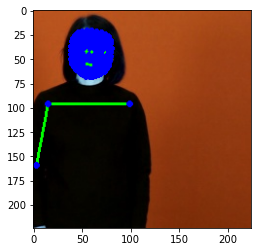

In [12]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

file_list = ['../data/pre/1_front/0/0_0.jpg']
with mp_holistic.Holistic(static_image_mode=True) as holistic:
    for idx, file in enumerate(file_list):
        print(idx, file)
        image = cv2.imread(file)
        image_height, image_width, _ = image.shape
        results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(annotated_image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    cv2.imwrite('result' + str(idx) + '.png', annotated_image)
    plt.imshow(annotated_image)

In [21]:
import time
import cv2 as cv
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

holistic = mp_holistic.Holistic(static_image_mode=True)

start = time.time()
image = cv.imread('../data/pre/1_front_num/0/0_75.jpg')
image_hight, image_width, _ = image.shape
print(image_hight, image_width)

# Convert the BGR image to RGB before processing.
results = holistic.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

# Draw pose, left and right hands, and face landmarks on the image.
annotated_image = image.copy()
mp_drawing.draw_landmarks(annotated_image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
print(time.time()-start)
cv.imshow('MediaPipe Holistic', annotated_image)
cv.imwrite('result.jpg', annotated_image)
cv.waitKey(0)
cv.destroyAllWindows()
holistic.close()

224 224
0.09113788604736328


### practice

In [13]:
import os
 
root_dir = 'C:/Users/ruby/data/pre' # 디렉토리
 
img_path_list = []
possible_img_extension = ['.jpg', '.jpeg', '.JPG', '.bmp', '.png'] # 이미지 확장자들
 
for (root, dirs, files) in os.walk(root_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in possible_img_extension:
                img_path = root + '/' + file_name
                
                # 경로에서 \를 모두 /로 바꿔줘야함
                img_path = img_path.replace('\\', '/') # \는 \\로 나타내야함         
                img_path_list.append(img_path)
                             
print(img_path_list)


['C:/Users/ruby/data/pre/10_front/0/0_0.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_1.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_10.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_100.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_101.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_102.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_103.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_104.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_105.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_106.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_107.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_108.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_109.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_11.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_110.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_111.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_112.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_113.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_114.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_115.jpg', 'C:/Users/ruby/data/pre/10_front/0/0_116.jpg', 'C:/Users/ruby/dat

In [16]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('C:/Users/ruby/data/pre/*.jpg'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)

In [17]:
image_list

[]

In [18]:
import glob
import cv2
images = [cv2.imread(file) for file in glob.glob("../data/pre/*.jpg")]

In [19]:
images

[]

In [22]:
import cv2
from pathlib import Path
path=Path(".")
path=path.glob("*.jpg")
images=[]

for imagepath in path.glob("../data/pre/*.jpg"):
        img=cv2.imread(str(imagepath))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)                         
        img=cv2.resize(img,(200,200))
        images.append(img)
print(images)

AttributeError: 'generator' object has no attribute 'glob'

In [23]:
import glob
import cv2 as cv
path = glob.glob("../data/pre/*.jpg")
cv_img = []
for img in path:
    n = cv.imread(img)
    cv_img.append(n)

In [24]:
cv_img

[]

In [25]:
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
path = '../data/pre/1_front/0/0_0.jpg'

image_pil = Image.open(path)
image = np.array(image_pil)

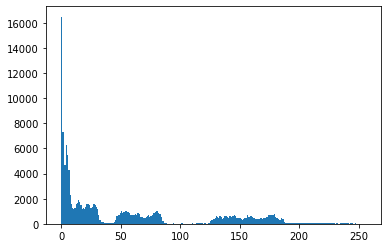

In [30]:
image.shape


#이미지 range 확인
np.min(image), np.max(image)


#이미지 시각화
plt.hist(image.ravel(),256,[0,256])
plt.show()

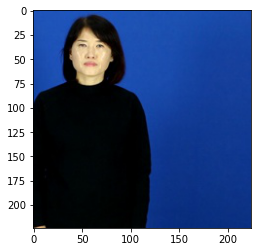

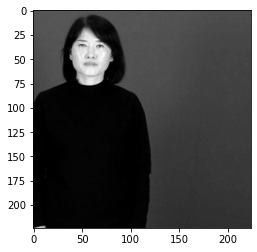

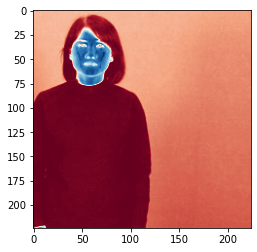

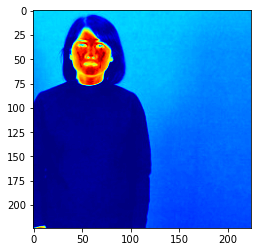

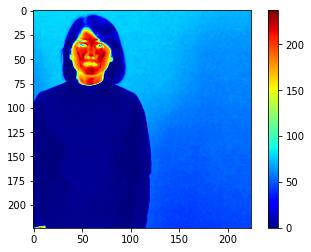

In [31]:
plt.imshow(image)
plt.show()



#이미지 흑백으로 열기
image_pil = Image.open(path).convert("L")
image_bw = np.array(image_pil)

plt.imshow(image_bw,'gray')
plt.show()


#이미지 red, blue로 열기
plt.imshow(image_bw,'RdBu')
plt.show()

#이미지 jet로 열기
plt.imshow(image_bw,'jet')
plt.show()

#color bar 추가하기
plt.imshow(image_bw,'jet')
plt.colorbar()
plt.show()

In [32]:
import os

path = '../data/pre/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.jpg')] 